In [17]:
import pandas as pd

data = pd.read_csv(r"C:\Users\win 10\Downloads\housing.csv", header=None, sep='\s+')
column_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = column_list
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

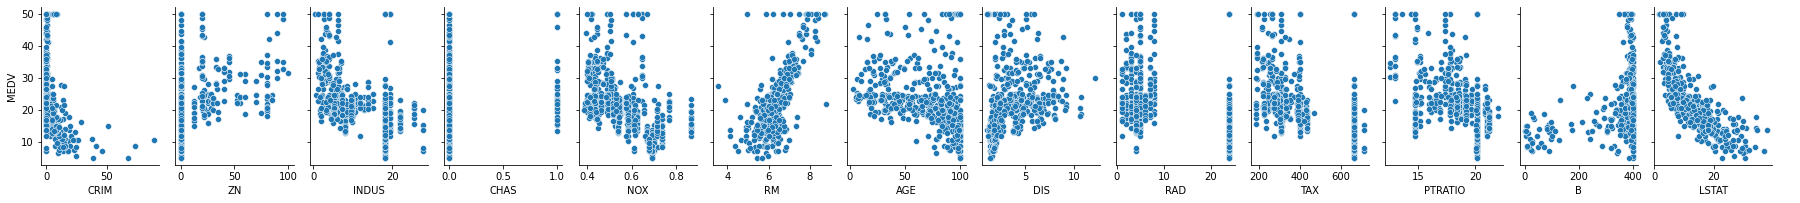

In [20]:
x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_vars = ['MEDV']
g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars)
g.fig.set_size_inches(25, 3)
g.map(sns.scatterplot)
g.add_legend()

<AxesSubplot:>

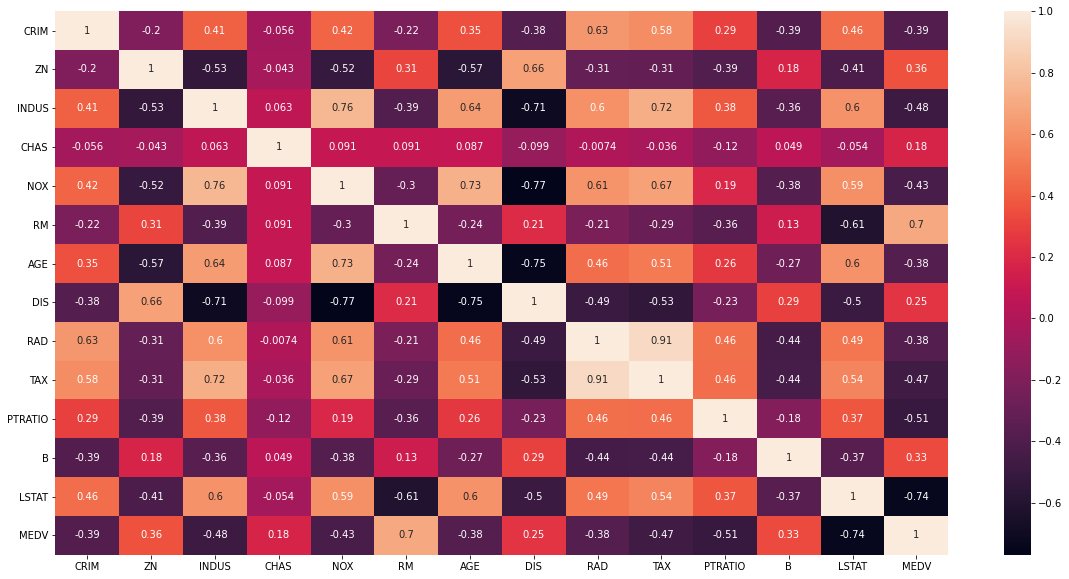

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),  annot=True)

In [22]:
from sklearn.model_selection import train_test_split

boston = data[['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT', 'PTRATIO', 'MEDV']]

features = boston.drop('MEDV', axis=1)
labels = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=43)

X_train.shape, X_test.shape, y_train.shape

((404, 7), (102, 7), (404,))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)

print('MAE:', mean_absolute_error(y_pred_linear, y_test))
print('MSE:', mean_squared_error(y_pred_linear, y_test))
print('R2_score:', r2_score(y_pred_linear, y_test))

MAE: 3.6003259859153083
MSE: 25.909816713844414
R2_score: 0.6294069508215394


Text(0, 0.5, 'MEDV')

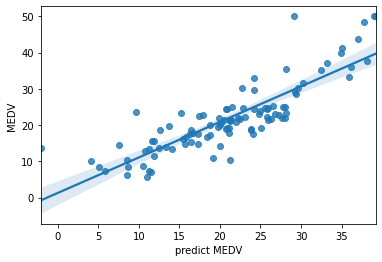

In [24]:
sns.regplot(x=y_pred_linear, y=y_test)
plt.xlabel('predict MEDV')
plt.ylabel('MEDV')

In [25]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, random_state=54, max_depth=10)
regr.fit(X_train, y_train)

y_pred_rnd = regr.predict(X_test)
print('MAE:', mean_absolute_error(y_pred_rnd, y_test))
print('MSE:', mean_squared_error(y_pred_rnd, y_test))
print('R2_score:', r2_score(y_pred_rnd, y_test))

MAE: 2.4130640435791673
MSE: 10.582415916312485
R2_score: 0.8719746517300108


<AxesSubplot:>

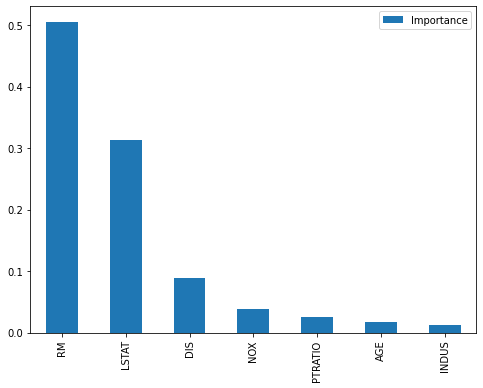

In [26]:
feat_importances = pd.DataFrame(regr.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

(5.0, 50.0)

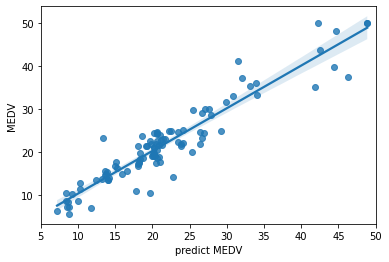

In [27]:
sns.regplot(x=y_pred_rnd, y=y_test)
plt.xlabel('predict MEDV')
plt.ylabel('MEDV')
plt.xlim(5, 50)

In [28]:
df = pd.DataFrame({'prediction': y_pred_rnd, 'test data': y_test, 'error': y_pred_rnd - y_test})
df.head()

,prediction,test data,error
360,22.476859,25.0,-2.523141
391,13.391038,23.2,-9.808962
247,20.582892,20.5,0.082892
57,29.903167,31.6,-1.696833
244,18.222117,17.6,0.622117


In [29]:
df[df['error'].abs() >= 5]

,prediction,test data,error
391,13.391038,23.2,-9.808962
214,18.534521,23.7,-5.165479
179,32.056157,37.2,-5.143843
427,17.792012,10.9,6.892012
431,22.804983,14.1,8.704983
226,46.353000,37.6,8.753000
273,41.820000,35.2,6.620000
369,42.273975,50.0,-7.726025
286,25.283471,20.1,5.183471
380,19.674701,10.4,9.274701
